In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import os, sys

Here we will develop the `ElectricalGrid()` graph object and fully visualize it!
I'm envisioning
- different symbols for various types of nodes:
  - solar, wind, hydro, nuclear, battery storage, 
    consumer vs. corporation, distributed system
- edges: 
  1. transmission line
  1. transformer
- color / bound microgrids together?
- add a map of the city to the background?
- color code the edges based on how much voltage?
- would be insane if we could visualize a live simulation of the grid, as it runs...

## Modelling the Grid as a Network
`networkx` (`nx`) offers basic graph/network construction and all of the basic graph algorithms (like Dijstra's, BFS, DFS, Max-Flow, etc.). All `nx` algorithms are listed [here](https://networkx.org/documentation/stable/reference/algorithms/index.html).

Here, we can see how the edges and nodes of an `nx` graph are stored, as well as how to iterate through them. Nodes are referenced with an integer id and edges are referenced as tuples between existing nodes. Additional node or edge data is encoded in a dictionary.

We can either encode a unique data object of a `Node()` or `Edge()`, and then reference the variables of this, or use the default dictionary and create a unique constructor that wraps the entire `nx` graph. 

iterating through possible edge indexes with a list():
(1, 2)
(2, 4)
{'voltage': 10} <class 'dict'>
10
(1, 2) {'voltage': 10}
(2, 4) {'voltage': 20}
1 {'type': 'solar'}
solar
2 {'type': 'wind'}
wind
3 {'type': 'hydro'}
hydro
4 {'type': id:4}
Node 4 of type solar
(1, 2, 10)
(2, 4, 20)


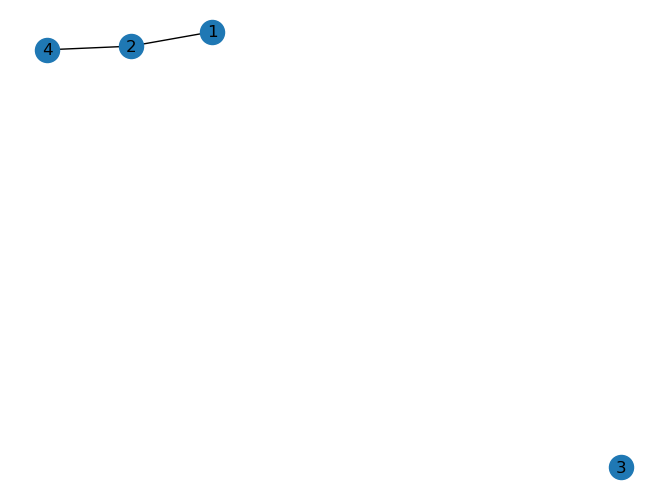

In [20]:

G = nx.Graph()

class Node:
    # a node representing an electrical grid component
    # and a vertex on the graph
    def __init__(self, id, type):
        self.id = id
        # consumer, producer, etc.?
        self.type = type
        # voltage?
        self.voltage = 0.0

    def __str__(self) -> str:
        return f"Node {self.id} of type {self.type}"
    
    def __repr__(self) -> str:
        return f"id:{self.id}"
    
    def __hash__(self) -> int:
        return self.id

node1 = Node(4, 'solar')
nodes = [(1, {'type': 'solar'}), (2, {'type': 'wind'}), (3, {'type': 'hydro'}), (4, {'type': node1})]
edges = [(1, 2, {'voltage': 10}), (2, 4, {'voltage': 20})]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# iterating through existing nx graph
# EDGES
print('iterating through possible edge indexes with a list():')
for e in list(G.edges):
    print(e)
    pass
edge = G.edges[1,2]  # is of type datadict
print(edge, type(edge))
print(edge['voltage'])
for e, datadict in G.edges.items():
    # can also use G.edges.values() to get just datadicts
    print(e, datadict)
    pass
for n, datadict in G.nodes.items():
    print(n, datadict)
    print(datadict['type'])
# can only iterate through edge data
for datadict in G.edges.values():
    pass
# specific attribute iteration
for voltage in G.edges.data('voltage'):
    print(voltage)
    pass


nx.draw(G, with_labels=True)
plt.show()

## Visualizing the Grid
We will use `pyvis` for graph creation. We will need to pass some additional data to make a custom (basic) visualizer here. I'm following the basic [PyVis tutorial](https://pyvis.readthedocs.io/en/latest/tutorial.html).

For some reason I can't get Jupyter to render the html in-line, even with nbformat. As a work-around, I downloaded Live Server for VSCode and you can pop open the html on your browser straight from VSCode.

In [4]:
from pyvis.network import Network

nt = Network(notebook=True, cdn_resources='in_line')
nt.from_nx(G)
nt.show('nx.html')
# save local PyVis visualizations to htmls directory
from IPython.display import IFrame

IFrame(src='./pyvis_output.html', width=700, height=600)

ModuleNotFoundError: No module named 'pyvis'

In [ ]:
# create graph object
net = Network(
    notebook=True,  # for running in Jupyter, makes an IFrame
    #while using notebook in chrome browser, to render the graph, pass additional kwarg ‘cdn_resources’ as ‘remote’ or ‘inline’
    cdn_resources='in_line',  # use remote resources
    select_menu=True,  # allows seletion of menu items
    filter_menu=True,  # allows filtering of menu items
    neighborhood_highlight=True,  # highlight neighborhood of selected node
    height='750px',  # set height of canvas
    width='100%',  # set width of canvas
    #bgcolor='#222222',  # set background color of canvas to dark grey
    #font_color='white',  # set font color of canvas
    heading='My Network',  # set title of canvas
    directed=False,  # set directed graph
    )  
# add nodes
net.add_nodes(
    # node ids
    [1, 2, 3, 4, 5], 
    # node values (store as vertices)
    value=[10, 20, 30, 40, 50], 
    x=[1,3,6,2,8],  # x-coordinates of nodes
    y=[0,3,1,0,2],  # y-coordinates of nodes
    # node labels on graph
    label=['Node #1', 'Node #2', 'Node #3', 'Node #4', 'Node #5'],
    # node titles (display on mouse hover)
    # can add html rendering
    title=['Main node', 'Just node', 'Just node', 'Just node', 'Node with self-loop'],
    color=['#d47415', '#22b512', '#42adf5', '#4a21b0', '#e627a3']  # node colors (HEX)
)
# add list of edges, same as in the previous example
net.add_edges([(1, 2), (1, 3), (2, 3), (2, 4), (3, 5), (5, 5)])

# toggle physics simulation when dragging vertices to reshape grid
net.toggle_physics(True) 
# show editable physics simulation options
net.show_buttons(filter_=['physics'])  # show only physics simulation
# copy paste the output from the buttons into this to finalize 
# physics options:
# net.set_options('{"physics": {"barnesHut": {"springLength": 100}}}')
setting_options = False
if setting_options:
    net.set_options("""

""")
net.show('graph.html')    # save visualization in 'graph.html'